In [1035]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1036]:
from cat_analysis.io import read_trips

In [1037]:
files = read_trips('/home/tom/Documents/code/cats_data')

In [1038]:
df = pd.read_csv(files[1], usecols=[i for i in range(33)])

In [1039]:
#reformat column header names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [1040]:
df['timestamp'] = pd.to_datetime(df['timestamp'], )

In [1041]:
records_per_sec = df.groupby(by='timestamp')['timestamp'].count()
records_per_sec.value_counts()

2    3681
1     115
3       3
Name: timestamp, dtype: int64

In [1042]:
df.shape

(7486, 33)

In [1043]:
df_small = df.iloc[0:]
df_small.shape

(7486, 33)

In [1044]:
replace = lambda a: None if a == 8388607.0 else a

In [1045]:
missing_value = 8388607.0
df_small = df_small.replace(8388607.0, None)

In [1046]:
df_small.sort_values(by=['timestamp'])

,catsid,timestamp,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
0,30612,2016-10-07 16:37:27,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""",NaN,NaN,"""",NaN,"""",0.45250305 0.45543346 0.45860806 0.46178266 0....,""""
1,30612,2016-10-07 16:37:28,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,52.625 51.125 50.375 50.125 50.4375 51 51.6875...,NaN,"""""""",0.47252747 0.47081807 0.46910867 0.46788767 0....,""""""""
2,30612,2016-10-07 16:37:28,6,104.0,100.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30612,2016-10-07 16:37:29,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,51.4375 53.0625 55.8125 59.25 63 66.5 69.5 71....,NaN,3.6666667 3.68 3.6933333 3.72 3.7333333 3.7466...,0.62686203 0.62148962 0.61391941 0.604884 0.59...,""""""""
4,30612,2016-10-07 16:37:29,6,104.0,100.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30612,2016-10-07 16:37:30,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,46.5625 47.25 48.6875 50.5625 52.375 53.9375 5...,NaN,4.04 4.04 4.0266667 4.0266667 3.84 3.6533333 3...,0.37240537 0.37777778 0.38778999 0.4031746 0.4...,-0.3 -0.3 -0.3 -0.3 -0.2984127 -0.26825397 -0....
6,30612,2016-10-07 16:37:30,6,104.0,100.0,NaN,NaN,NaN,NaN,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30612,2016-10-07 16:37:31,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005 0.005 0.005 0.005 -7.1054274e-15 -0.005 ...,NaN,NaN,109.8125 119.4375 124.875 125.5 121.5625 113.9...,NaN,0.053333333 0.053333333 0.053333333 0.05333333...,0.41489621 0.41098901 0.40708181 0.403663 0.40...,"1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ""1 1 1 1 1 1 1..."
8,30612,2016-10-07 16:37:31,6,104.0,100.0,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30612,2016-10-07 16:37:32,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.065 0.065 0.07 0.07 0.07 0.07 0.07 0.065 0.0...,NaN,NaN,52.875 52.8125 52.5 52.0625 51.4375 50.8125 50...,NaN,3.8133333 3.8266667 3.84 3.84 3.8533333 3.8533...,0.45396825 0.46471306 0.47179487 0.47399267 0....,-0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -...


In [1047]:
df_small['timestamp'].min()

Timestamp('2016-10-07 16:37:27')

In [1048]:
df_small['timestamp'].max()

Timestamp('2016-10-07 17:41:10')

In [1049]:
#actions
#1. type = concat
#2 hr_0002-4182 == aggregate drop NaN


In [1050]:
#lambdas to drop any NaNs from a set and revert to scaler
drop_nan = lambda a: {x for x in a if x==x}
revert_to_scalar = lambda a: a.values[len(a)-1] if len(a) > 0 else None
drop_missing = lambda a: a if a < 1000 else None

drop_nan.__name__ = 'drop_na'
revert_to_scalar.__name__ = 'scalar'
drop_missing.__name__ = 'drop_mis'

In [1051]:
dict_apply = {}

for col in df_small.columns[3:]:
    dict_apply[str(col)] = (set, drop_nan, revert_to_scalar)

In [1052]:
df_agg = pd.concat([df_small.groupby(by='timestamp')['catsid'].count(),
                   df_small.groupby(by='timestamp')['type'].apply(set),
                   df_small.groupby(by='timestamp').agg(dict_apply)],
                   axis=1)


df_agg.rename(columns={'catsid':'count'})
df_agg.head()

,catsid,type,"(hr_0002-4182, set)","(hr_0002-4182, drop_na)","(hr_0002-4182, scalar)","(spo2_0002-4bb8, set)","(spo2_0002-4bb8, drop_na)","(spo2_0002-4bb8, scalar)","(nbps_0002-4a05, set)","(nbps_0002-4a05, drop_na)",...,"(wcvp, scalar)","(wcoo, set)","(wcoo, drop_na)","(wcoo, scalar)","(wpleth, set)","(wpleth, drop_na)","(wpleth, scalar)","(wresp, set)","(wresp, drop_na)","(wresp, scalar)"
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:27,1,{9},{nan},{},NaN,{nan},{},NaN,{nan},{},...,NaN,"{""}","{""}","""",{0.45250305 0.45543346 0.45860806 0.46178266 0...,{0.45250305 0.45543346 0.45860806 0.46178266 0...,0.45250305 0.45543346 0.45860806 0.46178266 0....,"{""}","{""}",""""
2016-10-07 16:37:28,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, """"""}","{""""""}",NaN,"{nan, 0.47252747 0.47081807 0.46910867 0.46788...",{0.47252747 0.47081807 0.46910867 0.46788767 0...,NaN,"{nan, """"""}","{""""""}",NaN
2016-10-07 16:37:29,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 3.6666667 3.68 3.6933333 3.72 3.7333333 ...",{3.6666667 3.68 3.6933333 3.72 3.7333333 3.746...,NaN,"{nan, 0.62686203 0.62148962 0.61391941 0.60488...",{0.62686203 0.62148962 0.61391941 0.604884 0.5...,NaN,"{nan, """"""}","{""""""}",NaN
2016-10-07 16:37:30,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 4.04 4.04 4.0266667 4.0266667 3.84 3.653...",{4.04 4.04 4.0266667 4.0266667 3.84 3.6533333 ...,NaN,"{nan, 0.37240537 0.37777778 0.38778999 0.40317...",{0.37240537 0.37777778 0.38778999 0.4031746 0....,NaN,{-0.3 -0.3 -0.3 -0.3 -0.2984127 -0.26825397 -0...,{-0.3 -0.3 -0.3 -0.3 -0.2984127 -0.26825397 -0...,NaN
2016-10-07 16:37:31,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 0.053333333 0.053333333 0.053333333 0.05...",{0.053333333 0.053333333 0.053333333 0.0533333...,NaN,"{nan, 0.41489621 0.41098901 0.40708181 0.40366...",{0.41489621 0.41098901 0.40708181 0.403663 0.4...,NaN,"{nan, 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ""1 1 1 1...","{1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ""1 1 1 1 1 1 ...",NaN


In [1053]:
to_drop = [col for col in df_agg.columns[2:] if 'set' in col]
df_agg = df_agg.drop(columns=to_drop)

In [1054]:
to_drop = [col for col in df_agg.columns[2:] if 'drop_na' in col]
df_agg = df_agg.drop(columns=to_drop)

In [1055]:
dict_cols = {}
for col in df_agg.columns[2:]:
    dict_cols[col] = col[0]
   
df_agg = df_agg.rename(columns=dict_cols)

In [1056]:
df_agg.shape

(3799, 32)

In [1057]:
df_agg.head()

,catsid,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:27,1,{9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""",NaN,NaN,"""",NaN,"""",0.45250305 0.45543346 0.45860806 0.46178266 0....,""""
2016-10-07 16:37:28,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:29,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:30,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:31,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1058]:
df_agg.tail()

,catsid,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 17:41:06,2,"{9, 6}",100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:07,2,"{9, 6}",100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:08,2,"{9, 6}",99.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:09,2,"{9, 6}",99.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:10,2,"{9, 6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.015 -0.02 -0.02 -0.025 -0.03 -0.035 -0.04 -...,NaN,NaN,101 101.75 100.5 97.75 93.75 88.75 83.1875 77....,NaN,4.6533333 4.6533333 4.64 4.64 4.64 4.64 4.64 4...,0.44884005 0.43785104 0.42905983 0.42148962 0....,0.84 0.65301587 0.45809524 0.30190476 0.189206...


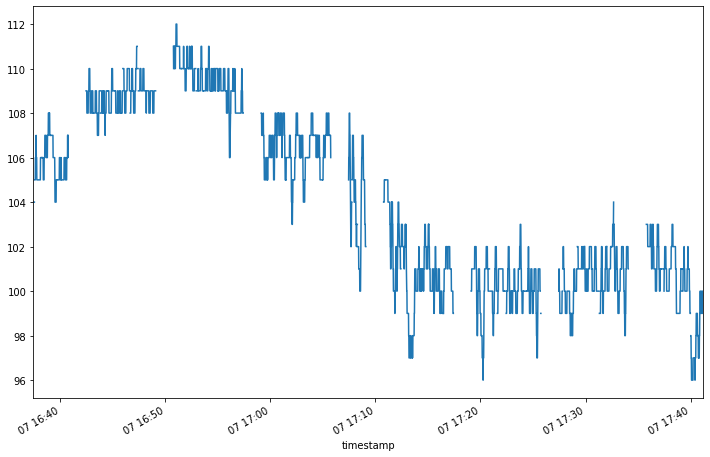

In [1060]:
df_agg['hr_0002-4182'].plot(figsize=(12,8))